<a href="https://colab.research.google.com/github/lucastribioli/introducao_data_science/blob/main/Introdu%C3%A7%C3%A3o_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados
---



## Pandas
---

In [2]:
#Instanciando o pandas e carregando arquivo csv
import pandas as pd

notas = pd.read_csv('ratings.csv')

In [3]:
#mostra o primeiros 5 itens 
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#mostra as medidas do dataframe
notas.shape

(100836, 4)

In [5]:
#Modificando o nome das colunas
notas.columns = 'id_user', 'id_movie', 'nota', 'duracao'
notas.head()

,id_user,id_movie,nota,duracao
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Remove os itens repetidos
notas['duracao'].unique()

array([ 964982703,  964981247,  964982224, ..., 1494273047, 1493846352,
       1493846415])

In [7]:
#Conta a quantidade de itens
notas['id_user'].count()

100836

In [8]:
#Retorna a mediana
notas['nota'].median()

3.5

In [9]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

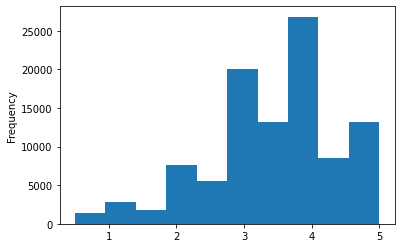

In [10]:
#Dá para ver o dados da coluna dessa forma, como atributo da classe
#Plot gera um gráfico e como argumento ele cria um histograma
notas.nota.plot(kind='hist')

In [11]:
#Dá uma descrição geral sobre a coluna
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

## Seaborn
---

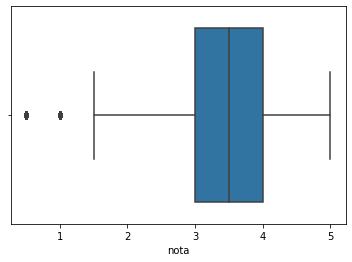

In [12]:
#importando o seaborn
import seaborn as sns

sns.boxplot(x=notas.nota)

In [13]:
filmes = pd.read_csv('movies.csv')
filmes.columns = 'id', 'titulo', 'genero'
filmes.head()

,id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
#faz uma consulta no dataframe e faz a média de notas
notas.query('id_movie==1').nota.mean()

3.9209302325581397

In [15]:
#agrupado por filme e depois a média das notas
medias = notas.groupby('id_movie').mean().nota

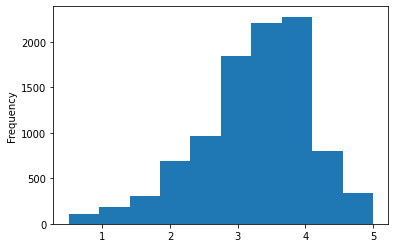

In [16]:
medias.plot(kind='hist')

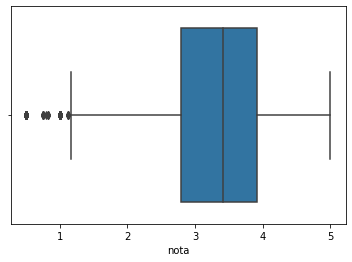

In [17]:
sns.boxplot(x=medias)

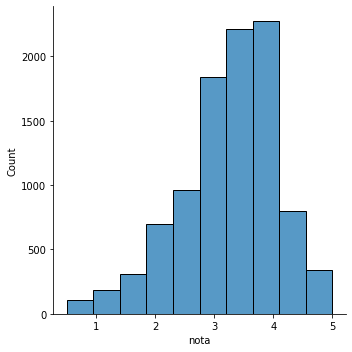

In [18]:
#histograma usando seaborn
sns.displot(x=medias, bins=10)

## Matplotlib

Text(0.5, 1.0, 'Histograma das notas')

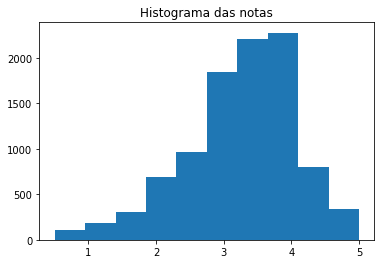

In [19]:
#importando matplotlib, as outras libs usam ele por baixo do panos
import matplotlib.pyplot as plt

plt.hist(medias)
plt.title('Histograma das notas')

In [21]:
lista_youtube = pd.read_csv('lista_youtube.csv')
lista_youtube.head()

,No.,Video name,Uploader,Views (billions),Publication date
0,1.0,"""Baby Shark Dance""[4]",Pinkfong Baby Shark - Kids' Songs & Stories,12.00,"June 17, 2016"
1,2.0,"""Despacito""[7]",Luis Fonsi,8.05,"January 12, 2017"
2,3.0,"""Johny Johny Yes Papa""[14]",LooLoo Kids,6.57,"October 8, 2016"
3,4.0,"""Bath Song""[15]",Cocomelon – Nursery Rhymes,5.89,2.May.18
4,5.0,"""Shape of You""[16]",Ed Sheeran,5.88,"January 30, 2017"


In [44]:
#Transforma a série em dataframe e reseta o index
contagem = lista_youtube['Video name'].value_counts().to_frame().reset_index()
print(type(contagem))
contagem

<class 'pandas.core.frame.DataFrame'>


,index,Video name
0,"""Baby Shark Dance""[4]",1
1,"""Despacito""[7]",1
2,"""Humpty the train on a fruits ride""[49]",1
3,"""Lean On""[48]",1
4,"""Bailando""[47]",1
5,"""Perfect""[46]",1
6,"""Girls Like You""[45]",1
7,"""Let Her Go""[44]",1
8,"""Faded""[43]",1
9,"""Waka Waka (This Time for Africa)""[42]",1


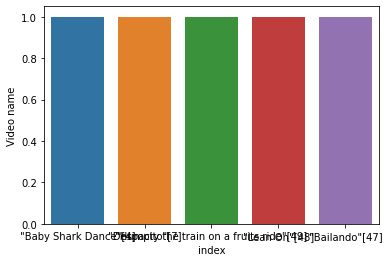

In [46]:
sns.barplot(x='index', y='Video name', data=contagem.head())

## Tipos de váriaveis
---

* categóricas nominal (tipo: idioma, tipo, etinia)
* categóricas ordinal (tipo: quando tem uma ordem)
* quantitativa contínuas (tipo: valores com casas decimais)
* quantitativa discretas (tipo: valores inteiros)